C:\Users\Jonathan\E3\projet\130_1306347376079_D.wav
Possible sounds: ['Artifact' 'Extrahs' 'Extrasystole' 'Murmur' 'Normal']
Number of total examples: 517
Example file tensor: tf.Tensor(b'mldataset\\Training\\Murmur\\Murmur\\197_1308141235553_A.wav', shape=(), dtype=string)
Number of total testing samples: 247
['C:\\', 'Users', 'Jonathan', 'E3', 'projet', '130_1306347376079_D.wav']
['130_1306347376079_D.wav', 'projet', 'E3', 'Jonathan', 'Users', 'C:\\']
tf.Tensor(b'projet', shape=(), dtype=string)


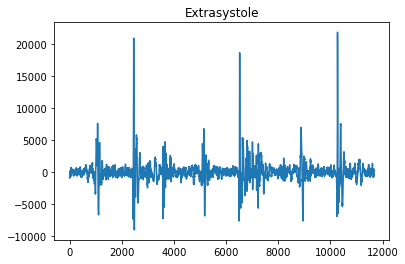

tf.Tensor([-950 -914 -974 ... -487 -663 -475], shape=(11671,), dtype=int16)
['C:\\', 'Users', 'Jonathan', 'E3', 'projet', "['MLDataset', 'Training', 'Extrasystole', 'Extrasystole', '253_1309350256198_B.wav']"]
["['MLDataset', 'Training', 'Extrasystole', 'Extrasystole', '253_1309350256198_B.wav']", 'projet', 'E3', 'Jonathan', 'Users', 'C:\\']
(<tf.Tensor: shape=(11671,), dtype=float32, numpy=
array([-0.0289917 , -0.02789307, -0.02972412, ..., -0.01486206,
       -0.02023315, -0.01449585], dtype=float32)>, <tf.Tensor: shape=(), dtype=string, numpy=b'projet'>)
['C:\\', 'Users', 'Jonathan', 'E3', 'projet', '[\'Tensor("args_0:0", shape=(), dtype=string)\']']
['[\'Tensor("args_0:0", shape=(), dtype=string)\']', 'projet', 'E3', 'Jonathan', 'Users', 'C:\\']


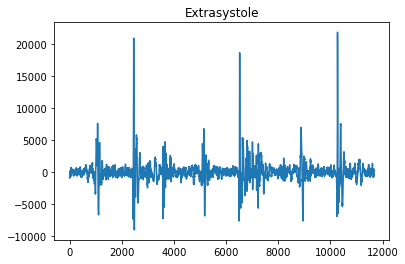

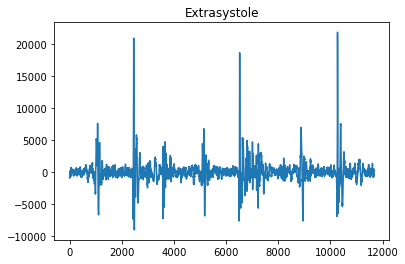

(<tf.Tensor: shape=(124, 129, 1), dtype=float32, numpy=
array([[[1.3881411e+03],
        [1.0683323e+04],
        [6.4367832e+03],
        ...,
        [1.9744717e+02],
        [1.3935019e+02],
        [1.4259650e+02]],

       [[6.8922803e+03],
        [3.5214949e+03],
        [1.1883541e+04],
        ...,
        [1.4887033e+02],
        [1.6852446e+01],
        [6.7082520e+00]],

       [[3.5197727e+03],
        [9.0308516e+03],
        [1.8259008e+04],
        ...,
        [3.1467517e+02],
        [2.0608528e+02],
        [2.1726929e+02]],

       ...,

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000

<ipython-input-6-eec2db52428a>:335: RuntimeWarning: divide by zero encountered in log
  log_spec = np.log(spectrogram.T)
<ipython-input-6-eec2db52428a>:340: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(X, Y, log_spec)


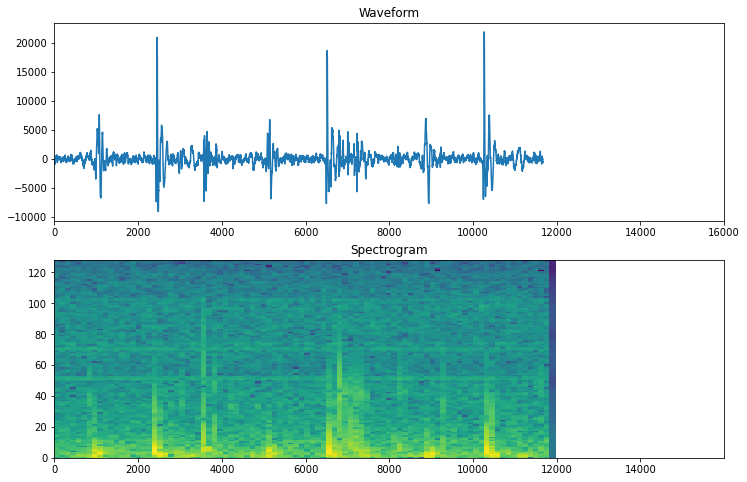

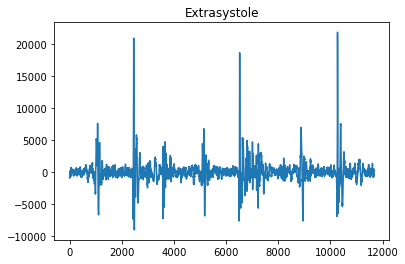

(<tf.Tensor: shape=(124, 129, 1), dtype=float32, numpy=
array([[[1.3881411e+03],
        [1.0683323e+04],
        [6.4367832e+03],
        ...,
        [1.9744717e+02],
        [1.3935019e+02],
        [1.4259650e+02]],

       [[6.8922803e+03],
        [3.5214949e+03],
        [1.1883541e+04],
        ...,
        [1.4887033e+02],
        [1.6852446e+01],
        [6.7082520e+00]],

       [[3.5197727e+03],
        [9.0308516e+03],
        [1.8259008e+04],
        ...,
        [3.1467517e+02],
        [2.0608528e+02],
        [2.1726929e+02]],

       ...,

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000

In [6]:
import os
import pathlib
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display
import wave
import sys
import ntpath

def splitall(path):
    allparts = []
    while 1:
        parts = os.path.split(path)
        if parts[0] == path:  # sentinel for absolute paths
            allparts.insert(0, parts[0])
            break
        elif parts[1] == path: # sentinel for relative paths
            allparts.insert(0, parts[1])
            break
        else:
            path = parts[0]
            allparts.insert(0, parts[1])
    return allparts



# Set seed for experiment reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)



print(os.path.abspath("130_1306347376079_D.wav"))

data_dir = pathlib.Path('mldataset/Training')

test_dir = pathlib.Path('MLDataset/Testing')

sounds = np.array(tf.io.gfile.listdir(str(data_dir)))
sounds = sounds[sounds != 'README.md']
print('Possible sounds:', sounds)


trainingFilenames = tf.io.gfile.glob(str(data_dir) + '/*/*/*/')
testFileNames = tf.io.gfile.glob(str(test_dir) + '/*')

trainingFilenames = tf.random.shuffle(trainingFilenames)

num_samples = len(trainingFilenames)
num_test_samples = len(testFileNames)

print('Number of total examples:', num_samples)
#print('Number of examples per label:',
 #     len(tf.io.gfile.listdir(str(data_dir/sounds[0]))))
print('Example file tensor:', trainingFilenames[0])


print('Number of total testing samples:', num_test_samples)

train_files = np.array(trainingFilenames)
#val_files = trainingfilenames[6400: 6400 + 800]
test_files = testFileNames




#print('Training set size', len(train_files))
#print('Validation set size', len(val_files))
#print('Test set size', len(test_files))


test_path = Path("MLDataset/Training/Extrasystole/Extrasystole/253_1309350256198_B.wav")    



def getFileNameFromPath(filePath):
    file_path = Path(filePath)
    head, tail = ntpath.split(file_path)
    return str(tail) or ntpath.basename(head)


#print(getFileNameFromPath(test_path))

def decode_audio(audio_binary):
    audio, _ = tf.audio.decode_wav(audio_binary)
    return tf.squeeze(audio, axis=-1)


#parts = tf.strings.split(data_dir, os.path.sep)

#print(parts)
#path = Path("/here/your/path/file.txt")
#print(path.parent())


def getLabel(filePath):
    filePath = filePath.split('/')
    label = filePath[2]
    return label


# def getLabelAsTensor(filePath):
#     filePath = filePath.split('/')
#     label = filePath[2]
#     label1 = str(label)
#     label1 = tf.convert_to_tensor(label)
#     return label1



# def getLabelAsTensor(filePath):
#     filePath = str(filePath)
#     filePath1 = filePath.split('/')
#     filePath2 = filePath1[0]
# #     print(filePath1)
# #     print(filePath2)
#     a = len(filePath1)
#     label1 = 0
#     if a < 2:
#         path = os.path.abspath(filePath)
#         path3 = splitall(path)
# #         path4 = []
# #         for i in range(len(path3)):
# #             path4.append(str(path3[i]))
#         path1 = str(path3)
#         print(path1)
#         path2 = path1.split("/")
#         print(path2)
#         path2.reverse()
#         print(path2)
#         label = path2[1]
#         label1 = tf.convert_to_tensor(label) 
#     else:
# #         filePath = np.array(filePath)
#         label = filePath2[2]
#         label1 = tf.convert_to_tensor(label)
    
#     return label1




def getLabelAsTensor(filePath):
    filePath = str(filePath)
    filePath1 = filePath.split('/')
    filePath2 = filePath1[0]
#     print(filePath1)
#     print(filePath2)
    a = len(filePath1)
    label1 = 0
    if a < 2:
        path = os.path.abspath(filePath)
        path3 = splitall(path)
        path4 = []
        for i in range(len(path3)):
            path4.append(str(path3[i]))
        
        path1 = str(path3)
        print(path4)
#         path2 = path1.split("/")
#         print(path2)
#         path2.reverse()
        path4.reverse()
        print(path4)
        label = path4[1]
        label1 = tf.convert_to_tensor(label) 
    else:
#         filePath = np.array(filePath)
        label = filePath2[2]
        label1 = tf.convert_to_tensor(label)
    
    return label1


# def getLabelAsTensor(filePath):
#     parts = tf.strings.split(filePath, os.path.sep)

#   # Note: You'll use indexing here instead of tuple unpacking to enable this 
#   # to work in a TensorFlow graph.
#     return parts[2] 



#     file_path = Path(filePath)
#     #parts = tf.strings.split(file_path.parent, os.path.sep)
#     #parts = tf.strings.split(filePath, sep = '\')
#     parts = file_path.parent
#     final_parts = tf.strings.split(parts, os.path.sep)
#     parts1 = str(parts)
#     #return parts
#     #print(parts[2])
    

# def getLabel(filePath):
#     file_path = Path(filePath)
#     parent_path = file_path.parent
#     parentPath = str(parent_path)
#     parts = tf.strings.split(parent_path, os.path.sep)
#     return parts[2]
    




print(getLabelAsTensor("130_1306347376079_D.wav"))

    
    
    
#print(os.path.basename(test_path2))

# print(getLabel(str(test_path)))


# def getWaveForm():
#     spf = wave.open("MLDataset/Training/Extrasystole/Extrasystole/253_1309350256198_B.wav", "rb")
#     signal = spf.readframes(-1)
#     signal = np.frombuffer(signal, "int16")
#     plt.figure(1)
#     plt.title("Signal Wave")
#     plt.plot(signal)
#     plt.show()



def getWaveform(filePath):
    spf = wave.open(filePath, "rb")
    signal = spf.readframes(-1)
    signal = np.frombuffer(signal, "int16")
    signal = np.array(signal)
    plt.figure(1)
    plt.title(getLabel(filePath))
    plt.plot(signal)
    plt.show()
    #tf.convert_to_tensor(signal)
    return tf.convert_to_tensor(signal)

    
print(getWaveform("MLDataset/Training/Extrasystole/Extrasystole/253_1309350256198_B.wav"))

def getWaveformAndLabel(filePath):
    waveform = getWaveform(filePath)
    label = getLabelAsTensor(filePath)
    return waveform, label

# print(getWaveformAndLabel("MLDataset/Training/Extrasystole/Extrasystole/253_1309350256198_B.wav"))


def get_waveform_and_label(file_path):
#     filePath = str(file_path)
    filePath = str(file_path)
    filePath1 = filePath.split('/')
#     print(filePath1)
    label = getLabelAsTensor(filePath1)                           #PB ICI A REVOIR (filePath a un seul arg?)
    audio_binary = tf.io.read_file(file_path)
    waveform = decode_audio(audio_binary)
    return waveform, label

print(get_waveform_and_label('MLDataset/Training/Extrasystole/Extrasystole/253_1309350256198_B.wav'))


AUTOTUNE = tf.data.AUTOTUNE
files_ds = tf.data.Dataset.from_tensor_slices(train_files)
waveform_ds = files_ds.map(get_waveform_and_label, num_parallel_calls=AUTOTUNE)






# print(getWaveformAndLabel("MLDataset/Training/Extrasystole/Extrasystole/253_1309350256198_B.wav"))


def get_spectrogram(waveform):
  # Padding for files with less than 16000 samples
    zero_padding = tf.zeros([16000] - tf.shape(waveform), dtype=tf.float32)

  # Concatenate audio with padding so that all audio clips will be of the 
  # same length
    waveform = tf.cast(waveform, tf.float32)
    equal_length = tf.concat([waveform, zero_padding], 0)
    spectrogram = tf.signal.stft(
      equal_length, frame_length=255, frame_step=128)

    spectrogram = tf.abs(spectrogram)

    return spectrogram





def get_spectro_and_label(filePath):
    waveform = getWaveform(filePath)
    spectro = get_spectrogram(waveform)
    spectro = tf.expand_dims(spectro, -1)
    label = getLabel(filePath)
    labelId = tf.argmax(label == sounds)
    return spectro, labelId
#     plt.title(label)
#     plot_spectrogram(spectro.numpy(), axes[0])
#     axes[1].set_title(label)

#     return spectro, label

alphaWaveform = getWaveform("MLDataset/Training/Extrasystole/Extrasystole/253_1309350256198_B.wav")



print(get_spectro_and_label("MLDataset/Training/Extrasystole/Extrasystole/253_1309350256198_B.wav"))








#print(getSpectrogram(alphaWaveform))

spectrogram = get_spectrogram(alphaWaveform)

def plot_spectrogram(spectrogram, ax):
  # Convert to frequencies to log scale and transpose so that the time is
  # represented in the x-axis (columns).
    log_spec = np.log(spectrogram.T)
    height = log_spec.shape[0]
    width = log_spec.shape[1]
    X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
    Y = range(height)
    ax.pcolormesh(X, Y, log_spec)


fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(alphaWaveform.shape[0])
axes[0].plot(timescale, alphaWaveform)
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])
plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()



print(get_spectro_and_label("MLDataset/Training/Extrasystole/Extrasystole/253_1309350256198_B.wav"))



# def getWaveform(filePath):
#     audioBinary = tf.io.read_file(filePath)
#     waveform = decode_audio(audio_binary)
#     return waveform



